In [96]:
# Import các thư viện cần thiết
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    def __init__(self, val=None, left=None, right=None, parent=None):
        self.left = left
        self.right = right
        self.val = val

class BST:
    def __init__(self, val):
        self.root = Node(val=val)

    def insert(self, val):
        new_node = Node(val=val)
        cur_node = self.root
        while True:
            if cur_node.val == new_node.val:
                print("can't insert this node")
                return False
            elif cur_node.val < new_node.val:
                if cur_node.right is None:
                    cur_node.right = new_node
                    return True
                else:
                    cur_node = cur_node.right
            else:
                if cur_node.left is None:
                    cur_node.left = new_node
                    return True
                else:
                    cur_node = cur_node.left

    def find(self, val):
        cur_node = self.root
        while True:
            if cur_node.val == val:
                return True
            elif cur_node.val < val and cur_node.right is not None:
                cur_node = cur_node.right
            elif cur_node.val > val and cur_node.left is not None:
                cur_node = cur_node.left
            else:
                return False

    def find_min(self):
        cur_node = self.root
        while cur_node.left is not None:
            cur_node = cur_node.left
        return cur_node.val

    def find_max(self):
        cur_node = self.root
        while cur_node.right is not None:
            cur_node = cur_node.right
        return cur_node.val
    
    def get_node_positions(self, node, pos=None, level=0, width=2.0, vert_gap=0.4, x=0):
        if pos is None:
            pos = {}
        if node is not None:
            pos[node.val] = (x, -level)  # Lưu vị trí của node
            left_x = x - width / (2 ** level)
            right_x = x + width / (2 ** level)
            # Vẽ vị trí của node con
            self.get_node_positions(node.left, pos, level + 1, width, vert_gap, left_x)
            self.get_node_positions(node.right, pos, level + 1, width, vert_gap, right_x)
        return pos
    def draw_tree(self):
        G = nx.DiGraph()  # Tạo đồ thị có hướng

        def add_edges(node):
            if node is not None:
                if node.left is not None:
                    G.add_edge(node.val, node.left.val)
                    add_edges(node.left)
                if node.right is not None:
                    G.add_edge(node.val, node.right.val)
                    add_edges(node.right)

        add_edges(self.root)

        pos = self.get_node_positions(self.root)  # Tính toán vị trí cho các node
        nx.draw(G, pos, with_labels=True, arrows=True, node_size=2000, node_color="lightblue", font_size=10)
        plt.show()



In [97]:
new_BST = BST(7)
new_BST.insert(3)
new_BST.insert(15)
new_BST.insert(9)
new_BST.insert(20)

True

In [98]:
new_BST.find(5)

False

In [99]:
new_BST.find(10)

False

In [100]:
max_value = new_BST.find_max()
print(max_value)

20


In [101]:
min_value = new_BST.find_min()
print(min_value)

3


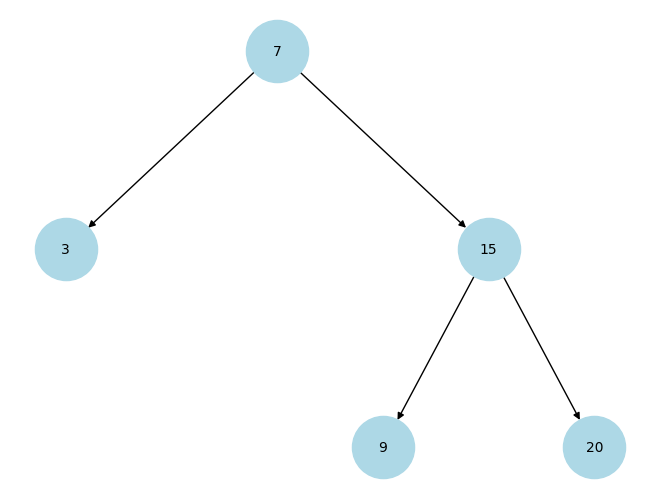

In [102]:
import matplotlib.pyplot as plt
import networkx as nx


new_BST.draw_tree()